# The Mariel Boatlift: a "*Natural Experiment*"

This week and next, we will explore the labor market effects of the Mariel Boatlift.  David Card (world famous economist who happens to teach at Berkeley) saw the boatlift as a "natural experiment" -- in which the supply of labor in Miami was increased suddenly, unexpectedly and in some important ways: randomly.  In his famous 1990 paper,  "The Impact of the Mariel Boatlift on the Miami Labor Market", Card sets out to measure the impact of this labor market change on wages and employment status of pre-boatlift residents of Miami.

This week and next, we will first replicate and then modestly extend Card's paper.  Of course, this would be an excellent time to have **already** read the paper -- which is avaialable on jstor as well as at: [http://davidcard.berkeley.edu/papers/mariel-impact.pdf]

The key substantive issue is whether and to what extent an increase in the labor supply leads to a reduction in wages of those previously resident.  This is precisely the question that we addressed in our discussion of simple neoclassical model of immigration depicted in this all too familiar app: http://shiny.demog.berkeley.edu/carlm/EconImmig0/.

The key technical challenge is to bootstrap a statistic that is  more complicated than a mean -- and the incorporation of sample weights. 

The steps involved are:
1. Recreate tables 1, 3 and 4 of Card's famous paper.
1. Draw some graphs to illustrate the quantities in question.
2. Use the bootstrap to verify of Card's regression based test and compare the outcomes.
3. Use bootstrap to test the effects on the labor market disaggregated by education and occupation -- tests which are not part of the original paper.

We will accomplish steps 1&2 this week and 3&4 next week.

The data that we will use is of course the same as that used by Professor Card: the "Outgoing Rotation Groups" from the Current Population Survey (CPS). The CPS is a venerable survey which has been constantly conducted since unemployment was invented in the 1930s.  The survey is done every month by the Census Burea for the Burea of Labor Statistics and its purpose is to measure unemployment.  To do so  it asks a series of questions which come down to: "Do you have a job" and if not "Are you looking for one".  The latter determines whether or not the respondent is "in the labor force" and the former whether or not the person is employed. 

Of course, because surveys of this sort are quite expensive, the CPS does not merely ask the Employed?/Looking? questions but rather administers an impressive battery of questions on a wide range of topics including things closely related to employment such as  education and occupation, but also on topics of broader  interest to academics and policy makers-- such as computer and internet use; health insurance; tobacco use; veteran status; migration and civic engagement. Most of these questions are contained in what are known as monthly "supplements" to the "base survey" (which is concerned with employment).  Best of all, lots these data are available through IPUMS http://ipums.org. The data for this lab, however, were downloaded originally from the NBER site which makes the data available in a form much closer to what Professor Card used back in the Twentieth Century.
http://http://www.nber.org/data/morg.html.

The "outgoing rotation groups" (ORG) refers to the way the survey is conducted: each month a new group of respondents is selected. Each group is then polled for four consecutive months; then left alone for next eight months; and then polled again for four months. The income and employment questions in which we are interested, are asked *only* in the fourth and eighth interviews. This all means that:

1. Each respondent (household) is asked these questions two times during their 16 months of survey participation.
2. Each month only one eighth of currently empaneled CPS respondents are asked these questions.


In [39]:
# Run this cell to import the stuff we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

%matplotlib inline


from datascience import Table
from datascience.predicates import are
datasite="http://courses.demog.berkeley.edu/mason88/data/"
quizsite="http://courses.demog.berkeley.edu/mason88/cgi-bin/quiz.py"

def cquiz(qno) :
    import IPython
    try :
        sid
    except NameError :
        print ('HEY! did you enter your sid way up at the top of this notebook?')

    Linkit='<a href="{0}?qno={1}&sid={2}" target="_quiz"> >>>>CLICK for Quiz<<<< </a>'.format(quizsite,qno,sid)
    return(IPython.display.HTML(Linkit))
    
 

In [2]:
   
###
# put your student id in the obvious place below - or you will find yourself typing it quite frequently
###
sid=""

if sid == "" :
    print("HEY! didn't I tell you to put your sid in the obvious place")

HEY! didn't I tell you to put your sid in the obvious place


## With whom are you working today?

Execute the cell bellow and then click the link it produces to indicate with whom you will be
working on this exercise.

In [4]:
cquiz('mariel-01partners')

In [5]:
# Read the data -- "morg" stands of "merged outgoing rotation groups" which are a subset of the data collected in 
# Current Population Survey

morg=Table.read_table(datasite+"morgClean.csv")

# and add the variable lnWage for log of hourly wage
morg=morg.with_column('lnWage',np.log(morg['Earnhr']))
morg

year,age,sex,EthRace,Educ,SMSA,class,Earnhr,Labf,Occupation,Unemp,occ70,occ80,esr,SelfEmployed,centcity,marital,classer,hourslwa,Earnwt,Weight3,lnWage
1979,56,2,NonHisp:white,13,LA-LongBeach,1,nan,True,Clerical,0,372,nan,1,False,2,4,1,40,581.165,565.41,nan
1979,54,1,NonHisp:white,12,LA-LongBeach,3,nan,True,More Skilled Service Wrks,0,962,nan,1,False,2,4,2,40,585.795,592.78,nan
1979,23,1,NonHisp:white,13,LA-LongBeach,1,11.3776,True,Transportation Operatives,0,705,nan,1,False,2,1,1,16,584.448,563.823,2.43164
1979,21,2,NonHisp:white,12,LA-LongBeach,1,4.0017,True,Clerical,0,301,nan,1,False,2,1,1,40,600.214,585.407,1.38672
1979,26,1,NonHisp:white,12,LA-LongBeach,1,12.0619,True,Clerical,0,305,nan,1,False,2,3,1,40,615.096,590.453,2.49005
1979,27,1,NonHisp:white,12,LA-LongBeach,1,nan,False,Craftsmen,nan,530,nan,4,False,2,3,1,nan,621.214,590.453,nan
1979,51,2,NonHisp:white,14,LA-LongBeach,6,nan,True,Managers,0,245,nan,1,True,2,1,3,40,557.721,585.217,nan
1979,54,1,NonHisp:white,12,LA-LongBeach,6,nan,True,Managers,0,245,nan,1,True,2,1,3,55,562.312,572.053,nan
1979,25,1,NonHisp:white,14,LA-LongBeach,6,nan,True,Managers,0,245,nan,1,True,2,7,3,40,635.56,619.837,nan
1979,17,2,NonHisp:white,11,LA-LongBeach,1,nan,False,Operatives,nan,643,nan,5,False,2,7,1,nan,594.488,577.88,nan


## Recreating Table 1

Table 1 in Card's paper,  gives some descriptive statistics for Miami in 1979 before the Mariel Boatlift happens.

Recreating it will give us a feel for both the structure of the data and the situation in Miami in 1979.

Because the CPS is responsible for producing an unemployment statistic for each and every state, county and SMSA-- by race, ethnicity and other demographic characteristics, a *simple random sample* turns out **not** to be the best way to do it.  Collecting these data are expensive, and in order to be assured of having enough observations in **each** geographical/demographic category, a simple random sample would have to be very large (expensive).  The way this is avoided is with a "stratified" random sample, which is a type of "probability sample" (as described: https://www.inferentialthinking.com/chapters/08/5/sampling.html) .  To oversimplify a bit,  a stratified random sample contains a certain number of observations chosen at random from *each* geographical area of interest and then weights are calculated to adjust statistics that are calculated from those data.  In order to calculate theses weights it is necessary to know each observation's probability of selection.  In the simplest case, this is just a the number of observations collected from the aread divided by the number of inidividuals in the area who could have been selected. In the case of the CPS, the sample is stratified in many more ways besides geography, so even within a region and year the weights vary across individuals. 

The way to use weights, in the present (typical) case, is to think of them as the number of people in the universe who are *represented* by each individual in the sample.  Thus the number of people in area A =$\sum_{i\in{A}}{w_i}$ where $w_i$ is the sample weight of individual i and $i\in{A}$ indicates that individual i lives in area A.

Similarly, the weighted average of some characteristic, c, of people who live in area A would be given by: 
$$\frac{\sum_{i\in{A}}{(c_i*w_i)}}{\sum_{i\in{A}}{w_i}}$$

The above formulae are what David Card used to compute the figures in his Table 1

In [6]:
## So turning to Table 1
## Here is some code to generate the top panel
miami79=morg.where('SMSA',"Miami").where('year',1979)
# create columns of c_i * w_i  characteristic * weight
miami79.append_column('EducWT',miami79['Educ']*miami79['Weight3'])
miami79.append_column('LabfWT',miami79['Labf']*miami79['Weight3'])
# sum the c_i*w_i and the w_i  to get numerator and denominators from equation above
tab1_1=miami79.select(['EthRace','Weight3','EducWT','LabfWT']).groups('EthRace',collect=np.nansum)
tab1_1.relabel('Weight3 nansum','N')
tab1_1.append_column('EducWTM',tab1_1['EducWT nansum']/tab1_1['N'])
tab1_1.append_column('LabfWTM',tab1_1['LabfWT nansum']/tab1_1['N'])
tab1_1

EthRace,N,EducWT nansum,LabfWT nansum,EducWTM,LabfWTM
Cuban,249871,2.73485e+06,193101,10.945,0.7728
HispanNotCuban,92191.9,1.06966e+06,63022.3,11.6025,0.683598
NonHisp:black,239256,2.71848e+06,163614,11.3622,0.683846
NonHisp:other,7656.72,72233.7,3653.56,9.43403,0.477171
NonHisp:white,313425,4.01745e+06,237850,12.8179,0.758876


# What do we think of these numbers ?

Profound discussion question: How close is close enough ?


## A note on weights

Constructing weights for survey samples is somewhat of a dark art.  While the principles are well understood, the execution invariably requires some judgement and compromise--mainly because the weighting always requires informatin external to the survey sample itself.  The CPS, for example, requires census data in order to know how many households exist in a particular county, as well as the demographic, racial and ethnic makeup of the region.  And if that were not enough, the Census is taken every 10 years, so  in years like 1979, the available census is quite out of date -- more judgement and external data are required in order to come up with estimates of 1979 population totals.

To get a flavor of what's involved, I half heartedly recommend taking a quick look at: https://www.census.gov/prod/2006pubs/tp-66.pdf.

The complexity/fragility of the weighting process is part of the reason that the CPS contain TWO weighting variables:  Weight3, that we have used thus far is one,  but there is also a column called 'Earnwt' which is a very slightly different weight that is supposed to be used for all earning related variables.  




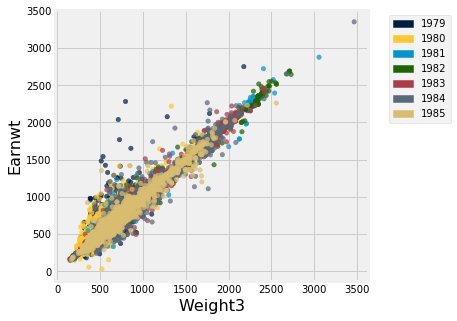

In [7]:
# scatter plot of two weighting variables
morg.scatter('Weight3','Earnwt',colors='year')

For your edification here are descriptions of the two weights from the NBER documentation:

weight:
>This is the Final Weight. The sum of the Final Weights in each monthly survey is the US non-institutional population. The CD-ROM excludes persons under 16 years of age. The outgoing rotation group includes one-fourth of that population. So one single month MORG file is one-fourth the population 16 years of age and over,and a year of MORG would sum to 3 times that population. Zero weights appear in some years, for records of unknown function. The implied two or four (1994 on) decimals on the tapes are explicit here. 1990-census-based weight for 2000-2002 are is
available as weightp.

earnwt:
>Earnings weight for all races. Used for tabulating earnings related items. Since the CD-ROM includes all persons asked earning questions, this sums to the total population each month and 12 times the population for each MORG file. This is not precisely 4 times the weight, presumably because the Census has external knowledge of the size and composition of the labor force. The implied decimals on the tapes are explicit here. A BLS letter suggests that this weight is preferred for all purposes. 1990-census-based earnwt for 2000-2002 is available as earnwtp. 


Fortunately, these details don't matter very much. I have experimented with both weights and (and with several other possible data adjustments and determined 2 things:

1. The weights matter very little
2. It is not possible to *precisely* reproduce Card's numbers despite having access to his computer code.




## Table 1  panel 2   (Code Required)

**Modify the code for panel 1 in order to produce panel 2 of Table 1**

Some notes:

1. 'Labf' is a True/False variable indicating whether the individual was in the labor force
2. 'age' is age in years those under 16 are not in the dataset
3. 'Educ' gives the number of years of school completed 
4. Your instructor believes that the weighted average number of years of education of non hispanic Blacks in Miami in 1979 was 11.7145.
4. When you have completed panel 2 of table 1 - click on the quiz link below to answer an easy question and get credit for your excellent work.

## Quiz please time click on the link below
http://courses.demog.berkeley.edu/mason88/cgi-bin/quiz.py?qno=mariel-01

In [9]:
cquiz('mariel-01')

## Recreating Table 3  log(hourly wage)

Let's turn now to Table 3. Below is some code to generate an UNWEIGHTED version of the table.
Your job is to modify the code to include weights.  

#### It turns out that there are two sets of weights in the CPS.  For our purposes which we use does not matter much, but for reasons that I will bore you with later, we will use 'Earnwt' instead of 'weight3' from now on.


In [14]:
## The unweighted version of Table 3
#for convenience a column that distinguishes Miami from the Control Cities
## here's a fancy list comprehension that produces a new variable which is either 'Miami' or 'Control' 
#morg.append_column('Miami/Control',[ x if x == 'Miami' else 'Control' for x in  morg['SMSA']])
morg.append_column('Miami',morg['SMSA'] =='Miami')
tab3_UW=morg.select(['Miami','EthRace','year','lnWage']).groups(['Miami','EthRace','year'],np.nanmean)
tab3_UW=tab3_UW.relabel('lnWage nanmean','meanLnWage')
tab3_UW.show(10)

Miami,EthRace,year,meanLnWage
False,Cuban,1979,1.79632
False,Cuban,1980,1.70961
False,Cuban,1981,1.59074
False,Cuban,1982,1.6664
False,Cuban,1983,1.51444
False,Cuban,1984,1.59408
False,Cuban,1985,1.77297
False,HispanNotCuban,1979,1.63725
False,HispanNotCuban,1980,1.61094
False,HispanNotCuban,1981,1.58639


In [15]:
# use .pivot to format tab3_UW to look more like in the paper 
# since there is ONE unique value for each category any function
# will work
print('Miami')
tab3_UW.where('Miami',True).pivot('year','EthRace',values='meanLnWage',collect= np.array).show()
print('Control')
tab3_UW.where('Miami',False).pivot('year','EthRace',values='meanLnWage',collect=np.array).show()

Miami


EthRace,1979,1980,1981,1982,1983,1984,1985
Cuban,[ 1.57164275],[ 1.53078704],[ 1.50791106],[ 1.49108711],[ 1.47783526],[ 1.52567677],[ 1.47948135]
HispanNotCuban,[ 1.5180354],[ 1.53917533],[ 1.53062283],[ 1.4989988],[ 1.4979383],[ 1.61532946],[ 1.54607018]
NonHisp:black,[ 1.57079024],[ 1.53024562],[ 1.60093198],[ 1.48328936],[ 1.46634004],[ 1.5627335],[ 1.60482155]
NonHisp:other,[ 1.46854883],[ 1.48779446],[ 1.59415529],[ 1.60368147],[ 1.46828513],[ 1.75903581],[ 1.88064167]
NonHisp:white,[ 1.8505392],[ 1.81971958],[ 1.83119816],[ 1.81330566],[ 1.79080883],[ 1.80916044],[ 1.78175627]


Control


EthRace,1979,1980,1981,1982,1983,1984,1985
Cuban,[ 1.79632342],[ 1.7096103],[ 1.59073511],[ 1.66639977],[ 1.51443649],[ 1.59407505],[ 1.77296542]
HispanNotCuban,[ 1.63725035],[ 1.61094336],[ 1.58639354],[ 1.58276967],[ 1.55929814],[ 1.57168919],[ 1.54052919]
NonHisp:black,[ 1.72760779],[ 1.69724201],[ 1.71581046],[ 1.71413471],[ 1.69466405],[ 1.6792562],[ 1.67632923]
NonHisp:other,[ 1.88093749],[ 1.78039208],[ 1.83494177],[ 1.8266476],[ 1.80299388],[ 1.80759272],[ 1.78144896]
NonHisp:white,[ 1.91238824],[ 1.88332444],[ 1.87920323],[ 1.87666716],[ 1.86023171],[ 1.86904451],[ 1.86971888]


These results, without weighting are reasonably close but we should be able to get closer to what Card found if we use   weights

## Table 3 with weights (Coding Required)

The same principles apply in Table 3 as in Table 1 as far as weights are concerned.
Below are a couple of lines to get you started. 

Notes:
1. One gotcha here is that there are some observations which have a nonzero Earnwt but for which Earnhr is missing.  I am not sure how this happens -- possibly there are people whose earnings are all from capital ? whatever the reason -- they need to be dropped when computing the denominator, $\sum{w_i}$.
2. Your instructor believes that the weighted mean log hourly wage of of Non-Hispanic whites in Miami in 1983 was 1.779269 
3. Use Earnwt for the weighting variable



In [16]:
# Table 3 with weights
# create a new column containing Earnhr multiplied by the weight variable
morg.append_column('lnWageWTD',np.log(morg['Earnhr'])*morg['Earnwt'])
# create new column indicating quality of Earnhr because there are observations with positive Earnwt and
# nan for Earnhr
morg.append_column('GoodWageDat',~np.isnan(morg['Earnhr']))


In [18]:
cquiz("mariel-04")

## How much difference do the weights make?

Discuss the histogram below


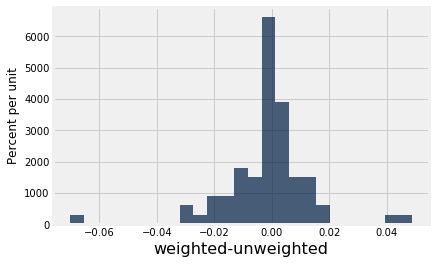

In [19]:
## Comparing the values with and without weights

# assuming you're result from above is called tab3
Table().with_column('weighted-unweighted',tab3['meanLnWage']-tab3_UW['meanLnWage']).hist(bins=25)


## Are the differences between your log wage estimates and Card's important? 

Have a thoughtful discussion about the possible sources of differences between your estimates and Card's.


To inform your discussion... you may read in the values in Card's Table 3 by
executing the following cell an then creating a histogram just like the one above?


In [20]:
## read data from Card's Table 3 which your instructor has thoughtfully typed for you
cardT3=Table.read_table('http://courses.demog.berkeley.edu/mason88/data/cardTable3.csv')
cardT3.append_column('Miami',cardT3['Miami'] =='yes')
cardT3.relabel('meanLnWage','cardMeanLnWage')
cardT3


EthRace,year,Miami,cardMeanLnWage
NonHisp:white,1979,True,1.85
NonHisp:white,1980,True,1.83
NonHisp:white,1981,True,1.85
NonHisp:white,1982,True,1.82
NonHisp:white,1983,True,1.82
NonHisp:white,1984,True,1.82
NonHisp:white,1985,True,1.82
NonHisp:black,1979,True,1.59
NonHisp:black,1980,True,1.55
NonHisp:black,1981,True,1.61


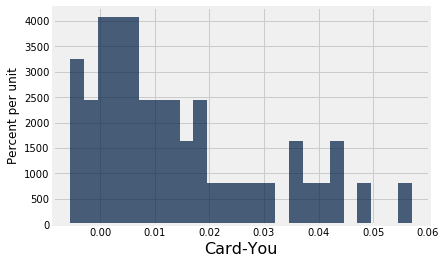

In [21]:
# Now to make the histogram comparing your results with Card's Table 3, we'll need to create a table wherein 
# one column holds Card's results and another holds your results. This should be a "simple" .join since cardT3
# and tab3 are similarly structured with columns for EthRace,year and Miami.

# It's tricker than it should be however, because .join only works on a single column -- and we would
# like to join rows based on three columns.  A reasonable solution is to create
## a variable, called 'rdx'  which is the concatination of EthRace,year and Miami

# surprisingly THIS does NOT work:
##cardT3.append_column(rdx,cardT3['EthRace']+cardT3['year'].astype(str))

#this works:
cardT3.append_column('rdx',np.char.add(
    np.char.add(cardT3['EthRace'],cardT3['year'].astype(str)),cardT3['Miami'].astype(str)))

tab3.append_column('rdx',np.char.add(
    np.char.add(tab3['EthRace'],tab3['year'].astype(str)),tab3['Miami'].astype(str)))
## and the join works
t3diff=cardT3.select(['rdx','cardMeanLnWage']).join('rdx',tab3)

# and the histogram
Table().with_column('Card-You',t3diff['cardMeanLnWage']-t3diff['meanLnWage']).hist(bins=25)



# Quiz time

excecute and click please.

In [22]:
cquiz('mariel-031')

# Summarize what we know so far with a few graphs

### The key question in this lab and the next is: to what extent, if any, were workers who lived in Miami in 1979 made worse off *as a result of* the influx of Cuban immigrants in 1980. Let's draw some graphs that compare wage trajectories of subgroups of Miami workers with similar people in the control group cities.

We'll start by writing a function that will do the calculations that we have been doing all day -- taking weighted averages of a value grouped by other characteristcs such as year, Miami residence and EthRace. Then we'll use the output to draw some useful graphs. The function, which will be quite useful innext week's exercise,  is provided, the graphs will require some coding.


In [23]:
## The function is essentially a generalization of the code that you have already written
## it is worth understanding how it works as we will use it again
def wtdMean(data,depvar,gvars=['Miami','year'],wvar='Earnwt'):

    """
    given a dataset (generally morg) a dependent variable column e.g. lnWage; a list of
    variables by which to group the data, gvars, and a weight column (Earnwt)
    returns a table with one row for each unique combination of gvars along  the corresponding
    weighted mean of depvar
    """
    # creat a list of columns of the input data that we need; we'll discard the rest
    # note that we need to copy rather than asign here as we still need gvars
    allvars=gvars.copy()
    allvars.append(depvar)
    allvars.append(wvar)
    #get rid of columns we don't need
    dset=data.select(allvars)
    #get rid of rows that we don't want
    dset=dset.where(~np.isnan(dset[wvar]))
    dset=dset.where(~np.isnan(dset[depvar]))
    # compute the numerator and denominator
    dset.append_column(depvar+'WTD',dset[depvar]*dset[wvar])
    result=dset.groups(gvars,collect=np.nansum)
    # and do the division
    result.append_column(depvar+"WTDmean",result[depvar+ 'WTD'' nansum']/result[wvar+' nansum'])
    # return the result tossing out some intermediate calcultions
    return(result.drop([depvar+" nansum",depvar+"WTD"+" nansum"]))

## Question about the wtdMean() function
run the cell and click please

In [24]:
cquiz('mariel-07')

In [25]:
# Example 0 - Using the wtdMean() funtion 
# mean wage of employed people in Miami vs control towns by year
MiamixCntrl=wtdMean(morg.where('Unemp',False),'Earnhr')
MiamixCntrl

Miami,year,Earnwt nansum,EarnhrWTDmean
False,1979,4.15235e+06,7.14083
False,1980,4.23782e+06,6.86234
False,1981,4.32592e+06,6.85359
False,1982,4.49854e+06,6.8572
False,1983,4.39765e+06,6.72925
False,1984,4.61485e+06,6.73462
False,1985,2.39498e+06,6.63037
True,1979,501561,5.95146
True,1980,552789,5.61872
True,1981,605294,5.72133


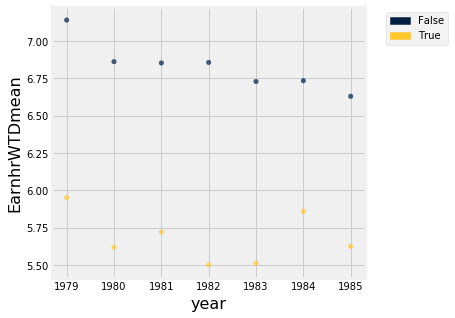

In [26]:
MiamixCntrl.scatter('year','EarnhrWTDmean',colors='Miami')

## Interpret the graph above
Please run and click the cell below

In [27]:
cquiz('mariel-06')

## Ponder the graphs below 

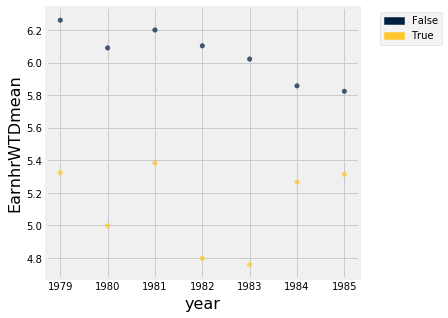

In [38]:

DepVar='Earnhr'
temp=wtdMean(morg.where('Unemp',False).where('EthRace','NonHisp:black'),DepVar)
temp.scatter('year',DepVar+'WTDmean',colors='Miami')

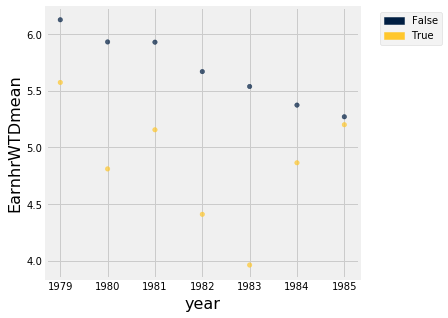

In [40]:
DepVar='Earnhr'
temp=wtdMean(morg.where('Unemp',False).where('EthRace','NonHisp:black').where('age',are.between_or_equal_to(20,30)),DepVar)
temp.scatter('year',DepVar+'WTDmean',colors='Miami')

# Congratulations you have completed this week's lab.